### Nonlinear Problems in Finance (MATH-GA.2045-001), New York University, Fall 2019
# Homework IV

### Due Date: 11:55 PM Tuesday, December 3, 2019


You should turn in the notebook at NYU Classes website.

Please comment your code properly.

Before you turn in the notebook, press the "Run all cells" button in the toolbar, and make sure all the calculation results and graphs are produced correctly in a reasonable time frame, and then save the notebook.

<h3 style="color:deepskyblue">Uncertain Volatility Model 1D</h3>

The price of a vanilla payoff $g(X_T)$ on a single asset $X_t$ in the uncertain volatility model satisfies the
one dimensional Black-Scholes-Barenblatt (BSB) PDE
\begin{align*}
\partial_tu(t,x)+\frac{1}{2}x^2\partial_x^2u(t,x)\Sigma\left(\partial_x^2u(t,x)\right)^2&=0\\
u(T,x)&=g(x)
\end{align*}
where
\begin{equation*}
\Sigma(\Gamma)=\left\{\begin{array}\,
\underline{\sigma} & \text{ if }\Gamma<0\\ \overline{\sigma} & \text{ if }\Gamma\geq 0\end{array}\right.
\end{equation*}
For the sake of simplicity, we assume zero interest rate and zero dividend and repo.

The BSB PDE is a fully nonlinear second order parabolic PDE which has a stochastic representation by second-oder BSDE. We are free to choose the diffusion for $X$; we pick a lognormal dynamics with some constant volatility $\hat\sigma$,

$$dX_t=\hat{\sigma} X_tdW_t$$

Two numerical schemes to solve 2-BSDEs are presented below. We first divide $(0, T)$ into $n$ subintervals $(t_{i-1}, t_i)$, $1\leq i\leq n$ and set $\Delta t_i=t_i-t_{i-1}$ and $\Delta W_{t_i} = W_{t_i} - W_{t_{i-1}}$.

<b>Scheme 1</b>
\begin{align*}
Y_{t_n}&=g(X_{t_n})\\
Z_{t_n}&=g'\left(X_{t_n}\right)\\
Y_{t_{i-1}}&=\mathbb{E}_{i-1}\left[Y_{t_i}\right]+\frac{1}{2}\Gamma_{t_{i-1}}X_{t_{i-1}}^2\left(\Sigma\left(\Gamma_{t_{i-1}}\right)^2-\hat{\sigma}^2\right)\Delta t_i\\
Z_{t_{i-1}}&=\frac{1}{\Delta t_i\hat{\sigma} X_{t_{i-1}}}\mathbb{E}_{i-1}\left[Y_{t_i}\Delta W_{t_i}\right]\\
\Gamma_{t_{i-1}}&=\frac{1}{\Delta t_i\hat{\sigma} X_{t_{i-1}}}\mathbb{E}_{i-1}\left[Z_{t_i}\Delta W_{t_i}\right]
\end{align*}

In the second scheme, we introduce explicitly the Malliavin weight for the log-normal diffusion with volatility $\hat{\sigma}$, so that $\Gamma$ can be estimated directly from $Y$ without computing $Z$ in the intermediate step. In particular, there is no need to compute the final condition $Z_{t_n}=g'\left(X_{t_n}\right)$. This could be useful to handle non-smooth payoffs.

<b>Scheme 2</b>
\begin{align*}
Y_{t_n}&=g(X_{t_n})\\
Y_{t_{i-1}}&=\mathbb{E}_{i-1}\left[Y_{t_i}\right]+\frac{1}{2}\Gamma_{t_{i-1}}X_{t_{i-1}}^2\left(\Sigma\left(\Gamma_{t_{i-1}}\right)^2-\hat{\sigma}^2\right)\Delta t_i\\
\Gamma_{t_{i-1}}&=\frac{1}{\left(\Delta t_i\hat{\sigma} X_{t_{i-1}}\right)^2}\mathbb{E}_{i-1}\left[Y_{t_i}\left(\Delta W_{t_i}^2-\Delta t_i\left(1+\hat{\sigma}\Delta W_{t_i}\right)\right)\right]
\end{align*}

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
import pandas as pd

<b style="color:darkorange">Question 1.</b> Consider pricing the call spread $\frac{100}{K_2-K_1}\left(\left(X_T-K_1\right)^+-\left(X_T-K_2\right)^+\right)$ in the uncertain volatility model, where

\begin{equation*}
\underline{\sigma}=0.1,\quad\overline{\sigma}=0.2,\quad X_0=100,\quad T=1, \quad K_1 = 90, \quad K_2 = 110
\end{equation*}

For your reference, the true price (from PDE) is $56.0$.

<b>(a).</b> Implement Scheme 1 with 12 time steps $(\Delta t_1=1/12)$ and 5000 paths. After you obtain estimates of $x\mapsto\Gamma\left(t_i, x\right)$ at each discretization time $t_i$, re-simulate a new set of independent paths following the process $dX_t = \Sigma(\Gamma(t,X_t))X_tdW_t$ to price the call spread, using more time steps (say, 400 $(\Delta t_2=1/400)$), and more paths (say, 50,000).

<ul>
<li> Experiment with different values of $\hat\sigma$, and smaller $\Delta t_1$. Comment on the results.
<li> Describe the region where the gamma is positive (resp. negative).
</ul>

<b>(b).</b> Implement Scheme 2 outlined above to price the call spread. As in part (a), after you obtain estimates of $x\mapsto\Gamma\left(t_i, x\right)$ at each discretization time $t_i$, re-simulate a new set of independent paths following the process $dX_t = \Sigma(\Gamma(t,X_t))X_tdW_t$ to price the call spread, using more time steps. Compare the results of the two schemes.


<b>(c).</b> In schemes 1 and 2, the estimations of the conditional expectations for $Z_{t_{i-1}}$ and $\Gamma_{t_{i-1}}$ may suffer large variances when $\Delta t_i$ is small. Control variates can be used to reduce the variance. For example, Scheme 2 can be modified as follows

<b>Scheme 2a</b>
\begin{align*}
Y_{t_n}&=g(X_{t_n})\\
Y_{t_{i-1}}&=\mathbb{E}_{i-1}\left[Y_{t_i}\right]+\frac{1}{2}\Gamma_{t_{i-1}}X_{t_{i-1}}^2\left(\Sigma\left(\Gamma_{t_{i-1}}\right)^2-\hat{\sigma}^2\right)\Delta t_i\\
\Gamma_{t_{i-1}}&=\frac{1}{\left(\Delta t_i\hat{\sigma} X_{t_{i-1}}\right)^2}\mathbb{E}_{i-1}\left[\left(Y_{t_i}-\mathbb{E}_{i-1}\left[Y_{t_i}\right]\right)\left(\Delta W_{t_i}^2-\Delta t_i\left(1+\hat{\sigma}\Delta W_{t_i}\right)\right)\right]
\end{align*}
Note that $Y_{t_i}$ on the right side of the last equation has been replaced by $Y_{t_{i}}-\mathbb{E}_{i-1}\left[Y_{t_i}\right]$.

Explain why this replacement does not change the left hand side. Implement Scheme 2a. Do you observe variance reduction?

For a justification of Scheme 2a, see the forthcoming written homework.

### Question 1.a

In [2]:
# parameter settings
sigL = 0.1
sigH = 0.2
X0 = 100
T = 1
K1 = 90
K2 = 110
nT1 = 12
nT2 = 400
ts_arr = np.array([np.linspace(0, T, nT1 + 1), np.linspace(0, T, nT2 + 1)])
npaths_arr = np.array([5000, 50000])

$g(x) = \frac{100}{K_2-K_1}\left(\left(X_T-K_1\right)^+-\left(X_T-K_2\right)^+\right)$

Take derivative, we have:
$g'(x) = \frac{100}{K_2-K_1}\left(I_{x>K_1}-I_{x>K_2}\right) = \frac{100}{K_2-K_1}I_{K_2>x>K_1}$

In [3]:
def blackscholes_mc(S=100, vol=0.2, r=0, q=0, ts=np.linspace(0, 1, 13), npaths=10):
    # This function is copied from previous homeworks given function
    """Generate Monte-Carlo paths in Black-Scholes model.

    Parameters
    ----------
    S: scalar
        The spot price of the underlying security.
    vol: scalar
        The implied Black-Scholes volatility.
    r: scalar
        The annualized risk-free interest rate, continuously compounded.
    q: scalar
        The annualized continuous dividend yield.
    ts: array_like
        The time steps of the simualtion
    npaths: int
        the number of paths to simulate

    Returns
    -------
    paths: ndarray
        The Monte-Carlo paths.
    """
    #np.random.seed(0)
    nsteps = len(ts) - 1
    ts = np.asfarray(ts)[:, np.newaxis]
    dW = np.vstack((np.zeros((1, npaths), dtype=np.float),
                             np.random.randn(nsteps, npaths) * np.sqrt(np.diff(ts, axis=0))))
        
    W = np.cumsum(dW, axis=0)
    paths = np.exp(-0.5*vol**2*ts + vol*W)*S*np.exp((r-q)*ts)
    return paths, dW

def pwlinear_basis(xknots):
    # This function is copied from previous homeworks given function
    """Basis that represent a piecewise linear function with given knots"""
    fs = [lambda x: np.ones_like(x, dtype=np.float), lambda x: x-xknots[0]]
    fs.extend([lambda x, a=xknots[i]: np.maximum(x-a, 0) for i in range(len(xknots))])
    return fs

def pwlinear_fit(xdata, ydata, xknots):
    # This function is copied from previous homeworks given function
    """Fit a piecewise linear function with xknots to xdata and ydata"""
    fs = pwlinear_basis(xknots)
    A = np.vstack([f(xdata) for f in fs]).T
    ps = np.linalg.lstsq(A, ydata, rcond=None)[0]
    return ps, fs

def g(x, X0 = X0, K1 = K1, K2 = K2):
    return X0 * (np.maximum(x - K1, 0) - np.maximum(x - K2, 0)) / (K2 - K1)

def dg_dx(x, X0 = X0, K1 = K1, K2 = K2):
    return X0 * np.where((K2 > x) & (x > K1), 1 , 0)/ (K2 - K1)

SIG = lambda x:np.where(x >= 0,sigH,sigL)

In [4]:
def Scheme1(ts_arr, npaths_arr, sigmaHat, nknots = 10, S0 = X0):
    ts1 , ts2 = ts_arr[0], ts_arr[1]
    npaths1, npaths2 = npaths_arr[0], npaths_arr[1]

    Xt = S0 * np.ones(npaths2)
    deltat1 = 1/(len(ts1) - 1)
    deltat2 = 1/(len(ts2) - 1)

    X, dW = blackscholes_mc(S=S0, vol=sigmaHat, r=0, q=0, ts=ts1, npaths=npaths1)
    dW = dW[1:] # we don't want the initial zeros
    Y = g(X[-1])
    Z = dg_dx(X[-1])

    ps_gamma = []
    fs_gamma = []
    # Part one, estimating x->Gamma
    for i in range(len(ts1)-2, -1, -1):
        xknots = np.linspace(np.percentile(X[i], 1), np.percentile(X[i], 99), 10)
        ps, fs = pwlinear_fit(X[i], Z*dW[i], xknots)
        ps_gamma.append(ps)
        fs_gamma.append(fs)
        gamma = sum([f(X[i])*p for (f, p) in zip(fs, ps)])/(deltat1*sigmaHat*X[i])

        ps, fs = pwlinear_fit(X[i], Y*dW[i], xknots)
        Z = sum([f(X[i])*p for (f, p) in zip(fs, ps)])/(deltat1*sigmaHat*X[i])

        ps, fs = pwlinear_fit(X[i], Y, xknots)
        Y = sum([f(X[i])*p for (f, p) in zip(fs, ps)])+gamma*np.square(X[i])*(np.square(SIG(gamma))-np.square(sigmaHat))*deltat1/2

    ps_gamma = ps_gamma[::-1]
    fs_gamma = fs_gamma[::-1]
    # Part two, using independent paths!
    for i in range(len(ts2)-1):
        idx = int(deltat2 * i / deltat1)
        est = sum([f(Xt)*p for (f, p) in zip(fs_gamma[idx], ps_gamma[idx])])
        Xt += SIG(est/ (deltat2*sigmaHat*Xt))*Xt*np.random.randn(npaths2)*np.sqrt(deltat2)

    return np.mean(g(Xt))

In [5]:
print("Scheme 1 Price with 0.18 sigmaHat is {}".format(Scheme1(ts_arr, npaths_arr, 0.18)))

Scheme 1 Price with 0.18 sigmaHat is 55.345933236583186


In [6]:
# Experiment with different values of sigmaHat, and smaller deltaT1.
def ts_arrBuilder(nT1 = 12, nT2 = 400, T = 1):
    return np.array([np.linspace(0, T, nT1 + 1), np.linspace(0, T, nT2 + 1)])

In [38]:
sigmaHats = np.linspace(0.1, 0.5, 11)
different_nt1 = 12*np.array(range(2, 7))
ts_arr0 = ts_arrBuilder()
price_different_nt1 = [Scheme1(ts_arr0, npaths_arr, sig) for sig in sigmaHats]
for nt1 in different_nt1:
    ts_arr0 = ts_arrBuilder(nt1)
    price_different_nt1 = np.vstack((price_different_nt1,[Scheme1(ts_arr0, npaths_arr, sig) for sig in sigmaHats]))
sigmaHats_col = ['sigmaHat: '+str(i)[:4] for i in sigmaHats]
deltaT1_row = ['deltaT1: '+str(1/i)[:6] for i in different_nt1]
deltaT1_row.insert(0,'deltaT1: '+str(1/12)[:6])

In [39]:
df0 = pd.DataFrame(columns=sigmaHats_col, index=deltaT1_row, data=price_different_nt1)
df0

,sigmaHat: 0.1,sigmaHat: 0.14,sigmaHat: 0.18,sigmaHat: 0.22,sigmaHat: 0.26,sigmaHat: 0.30,sigmaHat: 0.33,sigmaHat: 0.38,sigmaHat: 0.42,sigmaHat: 0.45,sigmaHat: 0.5
deltaT1: 0.0833,51.701684,54.695808,55.110396,54.809320,55.436061,55.435242,55.451554,55.025025,55.068045,54.817736,55.162517
deltaT1: 0.0416,50.110851,53.412867,54.873597,54.302805,54.949725,54.756057,54.988650,55.067007,53.745764,54.416526,55.201508
deltaT1: 0.0277,50.547907,52.406432,53.718369,54.314509,53.816825,54.776681,55.428618,54.563792,54.760332,54.912421,54.887022
deltaT1: 0.0208,50.112037,51.660877,52.930929,54.839679,53.529277,55.079873,54.628144,53.941273,54.395763,54.520514,54.303045
deltaT1: 0.0166,49.148085,52.133884,52.972040,53.554816,53.858739,54.797031,54.458331,54.431335,54.893306,53.962831,54.331959
deltaT1: 0.0138,49.050038,51.553024,52.648762,53.648305,53.434419,53.994347,53.869031,55.068623,53.500179,53.562267,54.000246


Comments: As we can see from the above table:

For a given deltat and a given number of path for the simulation. The optimal SigmaHat is around 30\%. The extreme value for both small SigmaHat and high SigmaHat is gives not reasonable estimation. 

Also, when the deltaT is smaller than $1/12$ and for a certain number of path and a certain sigmaHat, the larger the deltaT is, the more the accurate the the estimated price we have. In detail, this is feature of the how the BSDE numerical scheme diverges for too small increments. For smaller deltaT, we need more path to enhance the accuracy of estimation.

In [9]:
def drawScheme1Gamma(ts_arr, npaths_arr, sigmaHat, nknots = 10, S0 = X0):
    ts1 , ts2 = ts_arr[0], ts_arr[1]
    npaths1, npaths2 = npaths_arr[0], npaths_arr[1]

    Xt = S0 * np.ones(npaths2)
    deltat1 = 1/(len(ts1) - 1)
    deltat2 = 1/(len(ts2) - 1)

    X, dW = blackscholes_mc(S=S0, vol=sigmaHat, r=0, q=0, ts=ts1, npaths=npaths1)
    dW = dW[1:] # we don't want the initial zeros
    Y = g(X[-1])
    Z = dg_dx(X[-1])
    # Part one, estimating x->Gamma
    x=np.linspace(85,115,101)
    for i in range(len(ts1)-2, -1, -1):
        t = (i + 1) * deltat1
        xknots = np.linspace(np.percentile(X[i], 1), np.percentile(X[i], 99), 10)
        ps, fs = pwlinear_fit(X[i], Z*dW[i], xknots)
        
        gamma = sum([f(x)*p for (f, p) in zip(fs, ps)])/(deltat1*sigmaHat*x)
        plt.plot(x, gamma,label = 't: '+str(t)[:4])
    plt.legend(loc=2)
    plt.show()
    return

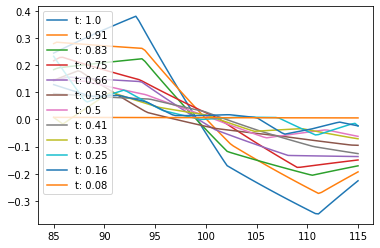

In [10]:
ts_arr0 = ts_arrBuilder()
drawScheme1Gamma(ts_arr0, npaths_arr, 0.18, nknots = 10, S0 = X0)

Comments: 

The region where the gamma is positive is more likely OTM and negtive gamma region is more likely ITM.  

Also, I noticed that, near the range between 90 and 100, the higher the stock prices are, the more negtive the gamma is. The more lower the stock prices are, the more postive the gamma is. I also notice that abs(gamma) is larger when the time approach to maturity.

### Question 1.b

In [11]:
def Scheme2(ts_arr, npaths_arr, sigmaHat, nknots = 10, S0 = X0):
    ts1 , ts2 = ts_arr[0], ts_arr[1]
    npaths1, npaths2 = npaths_arr[0], npaths_arr[1]
    Xt = S0 * np.ones(npaths2)
    deltat1 = 1/(len(ts1) - 1)
    deltat2 = 1/(len(ts2) - 1)

    X, dW = blackscholes_mc(S=S0, vol=sigmaHat, r=0, q=0, ts=ts1, npaths=npaths1)
    dW = dW[1:] # we don't want the initial zeros
    Y = g(X[-1])
    ps_gamma = []
    fs_gamma = []
    # Part one, estimating x->Gamma
    for i in range(len(ts1)-2, -1, -1):
        term1 = Y *(np.square(dW[i]) - deltat1 * (1 + sigmaHat * dW[i]))
        term2 = np.square(deltat1 * sigmaHat * X[i])
        xknots = np.linspace(np.percentile(X[i], 1), np.percentile(X[i], 99), 10)
        ps, fs = pwlinear_fit(X[i], term1, xknots)
        ps_gamma.append(ps)
        fs_gamma.append(fs)
        gamma = sum([f(X[i])*p for (f, p) in zip(fs, ps)])/term2
        term3 = gamma*np.square(X[i])*(np.square(SIG(gamma))-np.square(sigmaHat))*deltat1/2
        ps, fs = pwlinear_fit(X[i], Y, xknots)
        Y = sum([f(X[i])*p for (f, p) in zip(fs, ps)]) + term3

    ps_gamma = ps_gamma[::-1]
    fs_gamma = fs_gamma[::-1]
    # Part two, using independent paths!
    for i in range(len(ts2)-1):
        idx = int(deltat2 * i / deltat1)
        est = sum([f(Xt)*p for (f, p) in zip(fs_gamma[idx], ps_gamma[idx])])
        Xt += SIG(est)*Xt*np.random.randn(npaths2)*np.sqrt(deltat2)

    return np.mean(g(Xt))

In [12]:
Scheme2(ts_arr0, npaths_arr, 0.18)

53.11458008225973

Comments: 

Usually, the price of Scheme 2 is lower than the price of Scheme 1. The price of Scheme 2 is roughly 53 and the price of Scheme 1 is roughly 55.3. Abviously, the Scheme 1 give a better estimation. Also, the variance of Scheme 2 is larger than Scheme 1. All in all, Scheme 1 is better than Scheme 2.

### Question 1.c

My explanation of why this replacement does not change the left hand side is on the written paper.

In [13]:
def Scheme2a(ts_arr, npaths_arr, sigmaHat, nknots = 10, S0 = X0):
    ts1 , ts2 = ts_arr[0], ts_arr[1]
    npaths1, npaths2 = npaths_arr[0], npaths_arr[1]
    Xt = S0 * np.ones(npaths2)
    deltat1 = 1/(len(ts1) - 1)
    deltat2 = 1/(len(ts2) - 1)

    X, dW = blackscholes_mc(S=S0, vol=sigmaHat, r=0, q=0, ts=ts1, npaths=npaths1)
    dW = dW[1:] # we don't want the initial zeros
    Y = g(X[-1])
    ps_gamma = []
    fs_gamma = []
    # Part one, estimating x->Gamma
    for i in range(len(ts1)-2, -1, -1):
        term2 = np.square(deltat1 * sigmaHat * X[i])
        xknots = np.linspace(np.percentile(X[i], 1), np.percentile(X[i], 99), 10)
        ps, fs = pwlinear_fit(X[i], Y, xknots)
        YEst =  sum([f(X[i])*p for (f, p) in zip(fs, ps)])
        term1 = (Y - YEst) *(np.square(dW[i]) - deltat1 * (1 + sigmaHat * dW[i]))
        ps, fs = pwlinear_fit(X[i], term1, xknots)
        ps_gamma.append(ps)
        fs_gamma.append(fs)
        gamma = sum([f(X[i])*p for (f, p) in zip(fs, ps)])/term2
        term3 = gamma*np.square(X[i])*(np.square(SIG(gamma))-np.square(sigmaHat))*deltat1/2
        Y = YEst + term3

    ps_gamma = ps_gamma[::-1]
    fs_gamma = fs_gamma[::-1]
    # Part two, using independent paths!
    for i in range(len(ts2)-1):
        idx = int(deltat2 * i / deltat1)
        est = sum([f(Xt)*p for (f, p) in zip(fs_gamma[idx], ps_gamma[idx])])
        Xt += SIG(est)*Xt*np.random.randn(npaths2)*np.sqrt(deltat2)

    return np.mean(g(Xt))

In [14]:
Scheme2a(ts_arr0, npaths_arr, 0.18)

55.15964396769009

In [15]:
SchemeName = ['1','2','2a']
SchemeFun = [Scheme1, Scheme2, Scheme2a]
for i in range(3):
    print('The unbiased sample variance of Scheme'+ SchemeName[i] +' is {}'.format(np.var([SchemeFun[i](ts_arr0, npaths_arr, 0.18) for j in range(30)], ddof = 1)))

The unbiased sample variance of Scheme1 is 0.09920300014857024
The unbiased sample variance of Scheme2 is 0.3819471833645819
The unbiased sample variance of Scheme2a is 0.07483559738361542


Comments: 

From the above, we can see there is a sigficant reduce of variance of Scheme2a from the Scheme2. Yes, I observe variance reduction.

Please see the pdf:
Explaination of why this replacement does not change the left hand side


<h3 style="color:deepskyblue">The particle Method and Smile Calibration</h3>

<b style="color:darkorange">Question 2.</b> Consider the stochastic local volatility (SLV) model

$$
\begin{array}{l}
dS_t = a_t l(t, S_t) S_t dW^{(1)}_t\\
a_t=\sigma_0 e^{Y_t}\quad\text{where}\quad d Y_t = -\kappa Y_tdt+\gamma dW^{(2)}_t\\
d \langle W^{(1)}, W^{(2)} \rangle_t = \rho dt.
\end{array}
$$

The numerical values for the model parameters are
- $T = 1$.
- $S_0 = 100$.
- $\sigma_0 = 15\%$.
- $Y_0 = 0$.
- $\rho = -50\%$.
- $\gamma = 50\%$.
- $\kappa = 1$.

The goal is to find a leverage function $l(t, S)$ so that this model matches the market prices of vanilla options. For the sake of simplicity, we assume that the market implied volatility surface is flat $\sigma_{\textrm{Market}} \equiv 15\%$. In that case, we also have $\sigma_{\textrm{Dup}}(t,S) \equiv 15\%$.

Note that the above SLV model becomes a pure stochastic volatility model when the leverage function is identically equal to 1. Below we describe a Monte Carlo simulation scheme for the pure stochastic volatility model. You can modify it to simulate and calibrate the SLV model.

First we discretize the interval $(0,T)$ into subintervals $(t_{i-1}, t_i)$, $1\leq i\leq n$, and set $\Delta t_i=t_i-t_{i-1}$. 

The Ornstein-Uhlenbeck process $Y$ is explicitly solvable:
\begin{equation}
Y_{t_i}=e^{-\kappa\Delta t_i}Y_{t_{i-1}}+\int_{t_{i-1}}^{t_i}\gamma e^{\kappa\left(s-t_i\right)}dW_s^{(2)}.
\end{equation}

Therefore for given $Y_{t_{i-1}}$, $Y_{t_i}$ is a Gaussian variable with 
\begin{equation}\tag{1}
\mathbb{E}\left[\left.Y_{t_i}\right\vert Y_{t_{i-1}}\right]=e^{-\kappa\Delta t_i}Y_{t_{i-1}},\quad
\text{var}\left[\left.Y_{t_i}\right\vert Y_{t_{i-1}}\right]=\frac{\gamma^2}{2\kappa}\left(1-e^{-2\kappa\Delta t_i}\right)
\end{equation}

so that paths of $Y$ can be simulated exactly.

To simualte the spot process $S$, we use the Euler scheme:
$$\log S_{t_i}-\log S_{t_{i-1}}=-\frac{1}{2}\sigma_0^2e^{2Y_{t_{i-1}}}\Delta t_i+\sigma_0 e^{Y_{t_{i-1}}}\int_{t_{i-1}}^{t_i}dW^{(1)}_t$$

Thus for given $S_{t_{i-1}}$ and $Y_{t_{i-1}}$, $\log S_{t_i}$ and $Y_{t_i}$ are jointly Gaussian variables with

\begin{equation}\tag{2}
\mathbb{E}\left[\left.\log S_{t_i}\right\vert S_{t_{i-1}},Y_{t_{i-1}}\right]=\log S_{t_{i-1}}-\frac{1}{2}\sigma_0^2e^{2Y_{t_{i-1}}}\Delta t_i,\quad\text{Var}\left[\left.\log S_{t_i}\right\vert S_{i_{i-1}}, Y_{t_{i-1}}\right]=\sigma_0^2e^{2Y_{t_{i-1}}}\Delta t_i
\end{equation}

\begin{equation}\tag{3}
\text{Cov}\left[\left.Y_{t_i},\log S_{t_i}\right\vert S_{t_{i-1}}, Y_{t_{i-1}}\right]=\sigma_0 e^{Y_{t_{i-1}}}\frac{\gamma\rho}{\kappa}\left(1-e^{-\kappa\Delta t_i}\right)
\end{equation}

Over the time interval $[t_{i-1}, t_i]$, we can advance $\log S$ and $Y$ by generating Gaussian variables $\log S_{t_i}$ and $Y_{t_i}$ using equations (1)-(3).

<b>(a).</b> Implementation of the Particle Method.
- Implement the particle method studied in class to find the leverage function $l$. For this purpose, you may use the zero-th order non-parametric regression routine provided in the first assignment. We suggest that you use the quartic kernel

$$K(x)=(x+1)^2(1-x)^2\quad\text{for }-1\leq x\leq 1\quad\text{and}\quad0\quad\text{ elsewhere}$$

together with the bandwidth 

$$h = \kappa \sigma_{\mathrm{Market}} S_0 \sqrt{\max(t_k,0.15)}N^{-0.2}$$

at discretization date $t_k$. Make sure to fine-tune the dimensionless bandwidth parameter $\kappa$. Its order of magnitude is 1.0. Use $\Delta t = 1/100$, $N=10,000$ paths. Note: In class, we described an acceleration technique that involves sorting the "particles" $(S_{t_k},a_{t_k})$ according to the spot value $S_{t_k}$. Since the kernel we have chosen has compact support and is fairly inexpensive to evaluate, you may ignore this acceleration technique here. This means that each estimation of a conditional expectation $\mathbb{E}\left[\left.a_{t_k}^2\right\vert S_{t_k}=x\right]$ (for $x$ in a grid of spot values) involves the ratio of two sums of $N$ terms each.

- Check that the resulting model is indeed calibrated to the market implied volatilities $\sigma_{\textrm{Market}} \equiv 15\%$. To this end, compute estimates of the call prices (maturity $T=1$) in the calibrated model for strikes $70, 80, 90, 100, 110, 120, 130, 140$, and invert the Black-Scholes formula to get the corresponding estimation of the implied volatilities $\hat\sigma(T,K)$. To estimate the call prices in the calibrated model, simulate a new set of independent paths with the calibrated leverage function $l$ and $N_2 = 100,000$ paths. For the inversion of the Black-Scholes formula, you can use the function <code>blackscholes_impv</code> provided below.

<b>(b).</b> Fix the spot-vol correlation $\rho = 0\%$ and mean reversion $\kappa=1$. We study the impact of volatility of volatility $\gamma$ on the smile in the pure stochastic volatility model and calibrated leverage function in the SLV model. Perform the following tasks with various values of $\gamma$. Suggested values of $\gamma$: $0\%$, $25\%$, $50\%$, $75\%$.
- Recalibrate the leverage function $l(t,S)$ for each $\gamma$, and plot the calibrated leverage function $l(t, S)$ as a function of the spot value $S$ for a fixed maturity, e.g., $t = T$ with various values of $\gamma$ in the same graph. Comment on the dependence of the shape of the leverage function on $\gamma$.
- Plot the corresponding smile at maturity $T$ for the pure stochastic volatility model (set the leverage function $l \equiv 1$) with the various values of $\gamma$ in the same graph. Comment on the dependence of the shape of the smile on $\gamma$.

<b>(c).</b> Fix the volatility of volatility $\gamma = 50\%$ and mean reversion $\kappa=1$. We study the impact of spot-vol correlation $\rho$ on the smile in the pure stochastic volatility model and calibrated leverage function in the SLV model. Perform the following tasks with various values of $\rho$. Suggested values of $\rho$: $-50\%$, $0\%$, $50\%$.
- Recalibrate the leverage function $l(t,S)$ for each $\rho$, and plot the calibrated leverage function $l(t, S)$ as a function of the spot value $S$ for a fixed maturity, e.g., $t = T$ with various values of $\rho$ in the same graph. Comment on the dependence of the shape of the leverage function on $\rho$.
- Plot the corresponding smile at maturity $T$ for the pure stochastic volatility model (set the leverage function $l \equiv 1$) with the various values of $\rho$ in the same graph. Comment on the dependence of the shape of the smile on $\rho$.

<b>(d).</b> Fix the spot-vol correlation $\rho = 0\%$ and volatility of volatility $\gamma = 50\%$. We study the impact of mean reversion $\kappa$ on the smile in the pure stochastic volatility model and calibrated leverage function in the SLV model. Perform the following tasks with various values of $\kappa$. Suggested values of $\kappa$: $0.1$, $1$, $10$.
- Recalibrate the leverage function $l(t,S)$ for each $\gamma$, and plot the calibrated leverage function $l(t, S)$ as a function of the spot value $S$ for a fixed maturity, e.g., $t = T$ with various values of $\gamma$ in the same graph. Comment on the dependence of the shape of the leverage function on $\kappa$.
- Plot the corresponding smile at maturity $T$ for the pure stochastic volatility model (set the leverage function $l \equiv 1$) with the various values of $\kappa$ in the same graph. Comment on the dependence of the shape of the smile on $\kappa$.

<b>(e).</b> Consider the forward-starting straddle with payoff
\begin{equation*}
\left\vert \frac{S_{T_2}}{S_{T_1}}-1 \right\vert
\end{equation*}
with $T_1 = T - \frac{3}{12}$, $T_2 = T$. Use $\gamma = 100\%$, $\rho = -50\%$ and $\kappa=1$. Compare the prices of this option in the Black-Scholes model with volatility 15% and in the calibrated SLV model. Comment on the result. Why is it of interest to use stochastic local volatility models for pricing derivatives?

In [16]:
def blackscholes_price(K, T, S, vol, r=0, q=0, callput='call'):
    """Compute the call/put option price in Black-Scholes model
    
    Parameters
    ----------
    K: scalar or array_like
        The strike of the option.
    T: scalar or array_like
        The maturity of the option.
    S: scalar or array_like
        The spot price of the underlying security.
    vol: scalar or array_like
        The implied Black-Scholes volatility.
    callput: str
        Must be either 'call' or 'put'

    Returns
    -------
    price: scalar or array_like
        The price of the option.

    Examples
    --------
    >>> blackscholes_price(95, 0.25, 100, 0.2, r=0.05, callput='put')
    1.5342604771222823
    """
    F = S*np.exp((r-q)*T)
    w = vol**2*T
    d1 = (np.log(F/K)+0.5*w)/np.sqrt(w)
    d2 = d1 - np.sqrt(w)
    callput = callput.lower()
    if callput == 'call':
        opttype = 1
    elif callput == 'put':
        opttype = -1
    else:
        raise ValueError('The value of callput must be either "call" or "put".')
    price = (opttype*F*norm.cdf(opttype*d1)-opttype*K*norm.cdf(opttype*(d2)))*np.exp(-r*T)
    return price


In [17]:
# all inputs must be scalar
def blackscholes_impv_scalar(K, T, S, value, r=0, q=0, callput='call', tol=1e-6, maxiter=500):
    """Compute implied vol in Black-Scholes model
    
    Parameters
    ----------
    K: scalar
        The strike of the option.
    T: scalar
        The maturity of the option.
    S: scalar
        The spot price of the underlying security.
    value: scalar
        The value of the option
    callput: str
        Must be either 'call' or 'put'

    Returns
    -------
    vol: scalar
        The implied vol of the option.
    """
    if (K <= 0) or (T <= 0):
        return np.nan
    F = S*np.exp((r-q)*T)
    K = K/F
    value = value*np.exp(r*T)/F
    callput = callput.lower()
    if callput not in ['call', 'put']:
        raise ValueError('The value of "callput" must be either "call" or "put"')
    opttype = 1 if callput == 'call' else -1
    value -= max(opttype * (1 - K), 0)
    if value < 0:
        return np.nan
    if (value == 0):
        return 0
    j = 1
    p = np.log(K)
    if K >= 1:
        x0 = np.sqrt(2 * p)
        x1 = x0 - (0.5 - K * norm.cdf(-x0) - value) * np.sqrt(2*np.pi)
        while (abs(x0 - x1) > tol*np.sqrt(T)) and (j < maxiter):
            x0 = x1
            d1 = -p/x1+0.5*x1
            x1 = x1 - (norm.cdf(d1) - K*norm.cdf(d1-x1)-value)*np.sqrt(2*np.pi)*np.exp(0.5*d1**2)
            j += 1
        return x1 / np.sqrt(T)
    else:
        x0 = np.sqrt(-2 * p)
        x1 = x0 - (0.5*K-norm.cdf(-x0)-value)*np.sqrt(2*np.pi)/K
        while (abs(x0-x1) > tol*np.sqrt(T)) and (j < maxiter):
            x0 = x1
            d1 = -p/x1+0.5*x1
            x1 = x1-(K*norm.cdf(x1-d1)-norm.cdf(-d1)-value)*np.sqrt(2*np.pi)*np.exp(0.5*d1**2)
            j += 1
        return x1/np.sqrt(T)

# vectorized version
blackscholes_impv = np.vectorize(blackscholes_impv_scalar, excluded={'callput', 'tol', 'maxiter'})

# Example
blackscholes_impv(K=95, T=0.25, S=100, value=7, callput='call')

array(0.20654803)

In [18]:
def quartic_kernel(x):
    x = np.clip(x, -1, 1)
    return (x+1)**2*(1-x)**2
def kernel_delta(x,h):
    return quartic_kernel(x/h)/h
def bandwidth(t, k = 1.5, sigmaMkt = 0.15, S0 = 100, N = 100):
    return k*sigmaMkt*S0*np.sqrt(np.maximum(t, 0.15))*np.power(N,-0.2)
bandwidth(1)

8.957411337453685

### Question 2.a

This is a version with Spline to speed up

In [19]:
np.random.seed(39)
from scipy.interpolate import CubicSpline

T=1
S0=100
sigma0=0.15
sigmaDup=0.15
sigmaMkt=0.15
Y0=0
rho=-0.5
gamma=0.5
kappa=1
deltat=0.01
npaths=10000
npaths2=10000
nT=100
K_arr=np.linspace(70,140,8)

S=np.ones(npaths)*S0
Y=np.ones(npaths)*Y0
a=sigma0*np.exp(Y)

S_arr = []
a_arr = []
Y_arr = []
L_arr = []

S_arr.append(S[:])
a_arr.append(a[:])
Y_arr.append(Y[:])
# Running phase 1: estimate leverage function
for i in range(0,nT):
    dW1 = np.random.randn(npaths)*np.sqrt(deltat)
    dZ = np.random.randn(npaths)*np.sqrt(deltat)
    dW2 = dW1*rho+dZ*np.sqrt(1 - np.square(rho))
    if i == 0:
        dS = sigmaDup*S*dW1
    else:
        dS = a*lcs(S)*S*dW1
    S = S + dS
    dY = - kappa*Y*deltat + gamma*dW2
    Y = Y + dY
    a = sigma0 * np.exp(Y)
    def leverage_function(s,S=S,a=a,N=npaths):
        bw = bandwidth(t = i*deltat, N=N)
        denominator = np.sum(kernel_delta(S-s,bw))
        expectedaSqu = np.sum(np.square(a)*kernel_delta(S-s,bw))/denominator
        return sigmaDup/np.sqrt(expectedaSqu)
    # vectorized version
    leverage_vec = np.vectorize(leverage_function, excluded={'S', 'a','N'})
    S_tmp = np.linspace(10,200,191)
    l_tmp = leverage_vec(S_tmp)
    l_tmp = np.nan_to_num(l_tmp)
    lcs = CubicSpline(S_tmp, l_tmp)

    S_arr.append(S[:])
    a_arr.append(a[:])
    Y_arr.append(Y[:])
    L_arr.append(lcs)

# Running phase 2: independent MC

S=np.ones(npaths2)*S0
Y=np.ones(npaths2)*Y0
a=sigma0*np.exp(Y)


for i in range(0,nT):
    dW1 = np.random.randn(npaths2)*np.sqrt(deltat)
    dZ = np.random.randn(npaths2)*np.sqrt(deltat)
    dW2 = dW1*rho+dZ*np.sqrt(1 - np.square(rho))

    if i == 0:
        dS = sigmaDup*S*dW1
    else:
        dS = a*L_arr[i-1](S)*S*dW1
    S = S + dS
    dY = - kappa*Y*deltat + gamma*dW2
    Y = Y + dY
    a = sigma0 * np.exp(Y)


def payoff(K, S=S):
    S = S[np.logical_not(np.isnan(S))]
    return np.mean(np.maximum(S-K, 0))
payoff_vec = np.vectorize(payoff, excluded={'S'})
impvol=blackscholes_impv(K_arr, T=1, S=100, value=payoff_vec(K_arr), callput='call')

c:\users\tiany\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:47: RuntimeWarning: invalid value encountered in double_scalars


In [20]:
import pandas as pd
df = pd.DataFrame(list(zip(K_arr, impvol)), 
               columns =['Strike', 'implied_vol']).transpose()
df

,0,1,2,3,4,5,6,7
Strike,70.000000,80.000000,90.000000,100.000000,110.000000,120.000000,130.000000,140.000000
implied_vol,0.150923,0.149785,0.150463,0.149865,0.148911,0.148659,0.149306,0.150275


Comments:

Yes, I checked the implied_vols are around 15\%.

**This is a version without Spline technique to speed up**

Running time: 6.5 minutes

In [21]:
np.random.seed(999)
# running time: 6.5 minutes
T=1
S0=100
sigma0=0.15
sigmaDup=0.15
sigmaMkt=0.15
Y0=0
rho=-0.5
gamma=0.5
kappa=1
deltat=0.01
npaths=10000
npaths2=10000
nT=100
K_arr=np.linspace(70,140,8)

S=np.ones(npaths)*S0
Y=np.ones(npaths)*Y0
a=sigma0*np.exp(Y)

S_arr = []
a_arr = []
Y_arr = []

S_arr.append(S[:])
a_arr.append(a[:])
Y_arr.append(Y[:])
print('Running phase 1: estimate leverage function')
for i in range(0,nT):
    dW1 = np.random.randn(npaths)*np.sqrt(deltat)
    dZ = np.random.randn(npaths)*np.sqrt(deltat)
    dW2 = dW1*rho+dZ*np.sqrt(1 - np.square(rho))
    if i == 0:
        dS = sigmaDup*S*dW1
    else:
        dS = a*leverage_vec(S)*S*dW1
    S = S + dS
    dY = - kappa*Y*deltat + gamma*dW2
    Y = Y + dY
    a = sigma0 * np.exp(Y)
    
    def leverage_function(s,S=S,a=a,N=npaths):
        bw = bandwidth(t = i*deltat, N=N)
        denominator = np.sum(kernel_delta(S-s,bw))
        expectedaSqu = np.sum(np.square(a)*kernel_delta(S-s,bw))/denominator
        return sigmaDup/np.sqrt(expectedaSqu)
    # vectorized version
    leverage_vec = np.vectorize(leverage_function, excluded={'S', 'a','N'})


    S_arr.append(S[:])
    a_arr.append(a[:])
    Y_arr.append(Y[:])
    
print('Running phase 2: independent MC')

S=np.ones(npaths2)*S0
Y=np.ones(npaths2)*Y0
a=sigma0*np.exp(Y)


for i in range(0,nT):
    dW1 = np.random.randn(npaths2)*np.sqrt(deltat)
    dZ = np.random.randn(npaths2)*np.sqrt(deltat)
    dW2 = dW1*rho+dZ*np.sqrt(1 - np.square(rho))
    
    if i == 0:
        dS = sigmaDup*S*dW1
    else:
        dS = a*leverage_vec2(S)*S*dW1
    S = S + dS
    dY = - kappa*Y*deltat + gamma*dW2
    Y = Y + dY
    a = sigma0 * np.exp(Y)

    leverage_vec2 = np.vectorize(lambda x:leverage_function(x,S_arr[i],a_arr[i]), excluded={'S','a','N'})

def payoff(K, S=S):
    S = S[np.logical_not(np.isnan(S))]
    return np.mean(np.maximum(S-K, 0))
payoff_vec = np.vectorize(payoff, excluded={'S'})
impvol=blackscholes_impv(K_arr, T=1, S=100, value=payoff_vec(K_arr), callput='call')
import pandas as pd
df = pd.DataFrame(list(zip(K_arr, impvol)), 
               columns =['Strike', 'implied_vol']).transpose()
df

Running phase 1: estimate leverage function
Running phase 2: independent MC


c:\users\tiany\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in double_scalars


,0,1,2,3,4,5,6,7
Strike,70.000000,80.000000,90.000000,100.000000,110.000000,120.000000,130.000000,140.000000
implied_vol,0.180977,0.159329,0.154156,0.152957,0.151947,0.150491,0.148268,0.144378


Comment: Please see the above comment for the 2.a.

### Question 2.b

In [22]:
def Lev(gamma = 0.5,kappa = 1, rho = -0.5):
    np.random.seed(39)
    from scipy.interpolate import CubicSpline
    T=1
    S0=100
    sigma0=0.15
    sigmaDup=0.15
    sigmaMkt=0.15
    Y0=0
#     rho=-0.5
#     gamma=0.5
#     kappa=1
    deltat=0.01
    npaths=10000
    npaths2=10000
    nT=100
    K_arr=np.linspace(70,140,8)

    S=np.ones(npaths)*S0
    Y=np.ones(npaths)*Y0
    a=sigma0*np.exp(Y)

    S_arr = []
    a_arr = []
    Y_arr = []
    L_arr = []

    S_arr.append(S[:])
    a_arr.append(a[:])
    Y_arr.append(Y[:])
    # Running phase 1: estimate leverage function
    for i in range(0,nT):
        dW1 = np.random.randn(npaths)*np.sqrt(deltat)
        dZ = np.random.randn(npaths)*np.sqrt(deltat)
        dW2 = dW1*rho+dZ*np.sqrt(1 - np.square(rho))
        if i == 0:
            dS = sigmaDup*S*dW1
        else:
            dS = a*lcs(S)*S*dW1
        S = S + dS
        dY = - kappa*Y*deltat + gamma*dW2
        Y = Y + dY
        a = sigma0 * np.exp(Y)
        def leverage_function(s,S=S,a=a,N=npaths):
            bw = bandwidth(t = i*deltat, N=N)
            denominator = np.sum(kernel_delta(S-s,bw))
            expectedaSqu = np.sum(np.square(a)*kernel_delta(S-s,bw))/denominator
            return sigmaDup/np.sqrt(expectedaSqu)
        # vectorized version
        leverage_vec = np.vectorize(leverage_function, excluded={'S', 'a','N'})
        S_tmp = np.linspace(10,200,191)
        l_tmp = leverage_vec(S_tmp)
        l_tmp = np.nan_to_num(l_tmp)
        lcs = CubicSpline(S_tmp, l_tmp)

        S_arr.append(S[:])
        a_arr.append(a[:])
        Y_arr.append(Y[:])
        L_arr.append(lcs)
    return L_arr[-1]

c:\users\tiany\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:47: RuntimeWarning: invalid value encountered in double_scalars


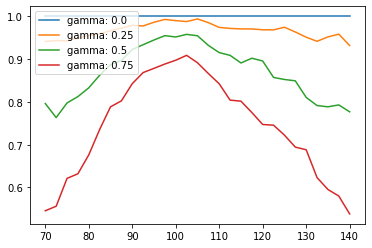

In [23]:
x=np.linspace(70,140,29)

for i in np.linspace(0,0.75,4):
    plt.plot(x, Lev(gamma = i,kappa =1, rho = 0)(x),label = 'gamma: '+str(i))
plt.legend(loc=2)
plt.show()

In [24]:
# Pure SV
def SV_ImpliedVol(strike = 100, gamma = 0.5,kappa = 1, rho = -0.5):
    np.random.seed(15)
    T=1
    S0=100
    sigma0=0.15
    sigmaDup=0.15
    sigmaMkt=0.15
    Y0=0
#     rho=-0.5
#     gamma=0.5
#     kappa=1
    deltat=0.01
    npaths=10000
    npaths2=10000
    nT=100
    K_arr=np.linspace(70,140,8)

    S=np.ones(npaths)*S0
    Y=np.ones(npaths)*Y0
    a=sigma0*np.exp(Y)

    # Running phase 1: estimate leverage function
    for i in range(0,nT):
        dW1 = np.random.randn(npaths)*np.sqrt(deltat)
        dZ = np.random.randn(npaths)*np.sqrt(deltat)
        dW2 = dW1*rho+dZ*np.sqrt(1 - np.square(rho))
        if i == 0:
            dS = sigmaDup*S*dW1
        else:
            dS = a*S*dW1
        S = S + dS
        dY = - kappa*Y*deltat + gamma*dW2
        Y = Y + dY
        a = sigma0 * np.exp(Y)
    priceOption = np.mean(np.maximum(S-strike,0))
    impvol=blackscholes_impv_scalar(K=strike, T=1, S=100, value=priceOption, callput='call')
    return impvol
SV_ImpliedVolVec = np.vectorize(SV_ImpliedVol, excluded={'gamma', 'kappa', 'rho'})

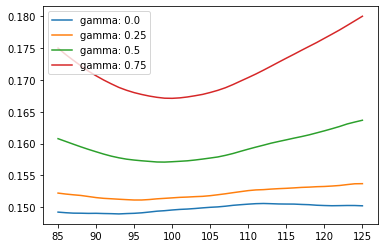

In [25]:
x=np.linspace(85,125,41)

for i in np.linspace(0,0.75,4):
    plt.plot(x, SV_ImpliedVolVec(x,gamma = i,kappa =1, rho = 0),label = 'gamma: '+str(i))
plt.legend(loc=2)
plt.show()

Comment on the dependence of the shape of the leverage function on $\gamma$ and comment on the dependence of the shape of the smile on $\gamma$:

There are smiles in the SV implied vol graph and there are frowns in the SLV leverage function graph.

Reason:
When the implied volatility increases from the market value, the leverage functions are as scale factors whose responsibility are scaling down the volatility for calibration. That's why we always have the inverse shape of implied volatility for the SV model and Leverage function for the SLV model.

From the graphs, we can see the larger values for volatility of volatility not only increases the curvature of the smile but also increases the implied volatility of various strike price.


### Question 2.c

c:\users\tiany\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:47: RuntimeWarning: invalid value encountered in double_scalars


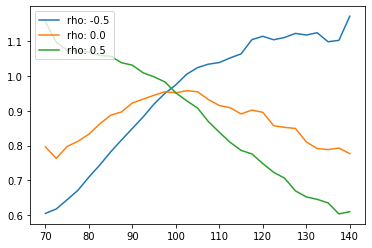

In [26]:
x=np.linspace(70,140,29)

for i in np.linspace(-0.5,0.5,3):
    plt.plot(x, Lev(gamma = 0.5,kappa =1, rho = i)(x),label = 'rho: '+str(i))
plt.legend(loc=2)
plt.show()

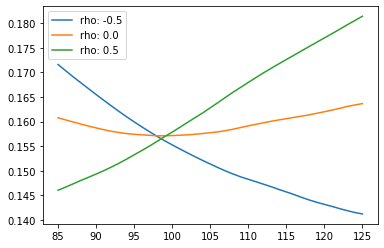

In [27]:
# Pure SV
x=np.linspace(85,125,41)

for i in np.linspace(-0.5,0.5,3):
    plt.plot(x, SV_ImpliedVolVec(x,gamma = 0.5,kappa =1, rho = i),label = 'rho: '+str(i))
plt.legend(loc=2)
plt.show()

Comments:

The shape in the SV implied vol graph and the shape of SLV leverage function graph are always inverse which means if one is simile the another will be frown. The reason behind this situation is disscussed in 2.b. When the implied volatility increases from the market value, the leverage functions are as scale factors whose responsibility are scaling down the volatility for calibration.

When we have negative $\rho$, the increase of the stock prices is probabily showed up with a dive down of the volatility. Also, the implied volatility is higher when we have lower strike price. In the leverage function curve from the SLV model, to caliberate the $15\%$ market volatility, we can also see the value is larger than 1 when the strike is larger than 100 USD.

When we have positive $\rho$, the increase of the stock prices is probabily showed up with an increase of the volatility. Also, the implied volatility is higher when we have higher strike price. In the leverage function curve from the SLV model, to caliberate the $15\%$ market volatility, we can also see the value is smaller than 1 when the strike is larger than 100 USD.

### Question 2.d

c:\users\tiany\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:47: RuntimeWarning: invalid value encountered in double_scalars


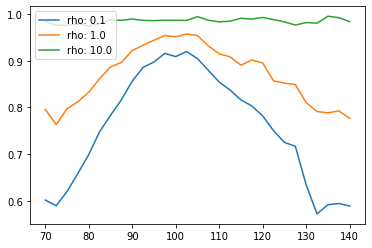

In [28]:
x=np.linspace(70,140,29)

for i in np.logspace(-1, 1, 3):
    plt.plot(x, Lev(gamma = 0.5,kappa =i, rho = 0)(x),label = 'rho: '+str(i))
plt.legend(loc=2)
plt.show()

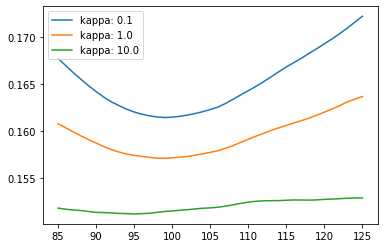

In [29]:
# Pure SV
x=np.linspace(85,125,41)

for i in np.logspace(-1, 1, 3):
    plt.plot(x, SV_ImpliedVolVec(x,gamma = 0.5,kappa =i, rho = 0),label = 'kappa: '+str(i))
plt.legend(loc=2)
plt.show()

Comments:

The shape in the SV implied vol graph and the shape of SLV leverage function graph are always inverse which means if one is simile the another will be frown. The reason behind this situation is disscussed in 2.b and 2.c. When the implied volatility increases from the market value, the leverage functions are as scale factors whose responsibility are scaling down the volatility for calibration. Basically speaking, their relationship is like if X = -Y, then $\partial X/\partial z = -\partial Y /\partial z$ 


When we have a lower $\kappa$ (mean-reverting happens slowly), the volatility of the volatility process has a huge influence on the underlying asset price process which leads to a smile in the SV-implied vol and a frown in the SLV-leverage functions.

When we have a higher $\kappa$ (mean-reverting happens fastly), the volatility of the volatility process has a tiny influence on the underlying asset price process which leads to a falt shape in the SV-implied vol and in the SLV-leverage functions.

### Question 2.e

In [30]:
np.random.seed(39)
from scipy.interpolate import CubicSpline

T=1
S0=100
sigma0=0.15
sigmaDup=0.15
sigmaMkt=0.15
Y0=0
rho=-0.5
gamma=0.5
kappa=1
deltat=0.01
npaths=10000
npaths2=10000
nT=100
K_arr=np.linspace(70,140,8)

S=np.ones(npaths)*S0
Y=np.ones(npaths)*Y0
a=sigma0*np.exp(Y)

S_arr = []
a_arr = []
Y_arr = []
L_arr = []

S_arr.append(S[:])
a_arr.append(a[:])
Y_arr.append(Y[:])
# Running phase 1: estimate leverage function
for i in range(0,nT):
    dW1 = np.random.randn(npaths)*np.sqrt(deltat)
    dZ = np.random.randn(npaths)*np.sqrt(deltat)
    dW2 = dW1*rho+dZ*np.sqrt(1 - np.square(rho))
    if i == 0:
        dS = sigmaDup*S*dW1
    else:
        dS = a*lcs(S)*S*dW1
    S = S + dS
    dY = - kappa*Y*deltat + gamma*dW2
    Y = Y + dY
    a = sigma0 * np.exp(Y)
    def leverage_function(s,S=S,a=a,N=npaths):
        bw = bandwidth(t = i*deltat, N=N)
        denominator = np.sum(kernel_delta(S-s,bw))
        expectedaSqu = np.sum(np.square(a)*kernel_delta(S-s,bw))/denominator
        return sigmaDup/np.sqrt(expectedaSqu)
    # vectorized version
    leverage_vec = np.vectorize(leverage_function, excluded={'S', 'a','N'})
    S_tmp = np.linspace(10,200,191)
    l_tmp = leverage_vec(S_tmp)
    l_tmp = np.nan_to_num(l_tmp)
    lcs = CubicSpline(S_tmp, l_tmp)

    S_arr.append(S[:])
    a_arr.append(a[:])
    Y_arr.append(Y[:])
    L_arr.append(lcs)

# Running phase 2: independent MC

S=np.ones(npaths2)*S0
Y=np.ones(npaths2)*Y0
a=sigma0*np.exp(Y)


for i in range(0,nT):
    dW1 = np.random.randn(npaths2)*np.sqrt(deltat)
    dZ = np.random.randn(npaths2)*np.sqrt(deltat)
    dW2 = dW1*rho+dZ*np.sqrt(1 - np.square(rho))

    if i == 0:
        dS = sigmaDup*S*dW1
    else:
        dS = a*L_arr[i-1](S)*S*dW1
    S = S + dS
    dY = - kappa*Y*deltat + gamma*dW2
    Y = Y + dY
    a = sigma0 * np.exp(Y)
    if i == nT *(T - (3/12)) - 1:
        S_prev = S[:]


def payoff(S=S, S_prev = S_prev):
    Snanidx = np.where(np.isnan(S))[0]
    S_prevnanidx = np.where(np.isnan(S_prev))[0]
    unionidx = np.union1d(Snanidx, S_prevnanidx)
    S = S[~np.in1d(range(len(S)),unionidx)]
    S_prev = S_prev[~np.in1d(range(len(S_prev)),unionidx)]
    return np.mean(np.abs(S/S_prev-1))
payoff()

c:\users\tiany\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:47: RuntimeWarning: invalid value encountered in double_scalars


0.058131553737232784

In [31]:
def BS_price(S0 = 100, volBS = 0.15, T = 1, nT = 100, N = int(1e6)):
    S = S0*np.ones(N)
    for i in range(nT):
        if i == nT *(T - (3/12)) - 1:
            S_prev = S[:]
        S = S + S*volBS*np.random.randn(N)*np.sqrt(T/nT)
    return np.mean(np.abs(S/S_prev - 1))
BS_price()

0.06099663187523436

Comment: 

SLV model price is 0.058 USD and the price of BS model is 0.061 USD. The price of BS model and SLV model are pretty close. The SLV price is a little bit lower.

In the BS model, the constant volatility is competible to the forward-starting straddle. However, for other products, because of the unknown future volatility and other inner driven factors of the volatility, the constant volatility is not a good chioce.

For the SLV model, it useful because it can caliberate and capture the market volatility. It is calibrated based on the price of the stock strikes and due times, and therefore includes the term structure of implied volatility and the randomness of volatility. In this situation, in a fixed-term structure, the leverage function is always less than 1 which will likely resulting in the lowest price.